<a href="https://colab.research.google.com/github/alexcoy06/Data-Science/blob/main/Project%203/Megaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Project Overview and Setup: Understanding the Purpose

As an analyst at Megaline, a telecom company, I'm investigating our two prepaid plans: Surf and Ultimate. The marketing team needs to know which plan is making more money so they can decide where to spend their advertising dollars.

To start, I'll look at data from 500 of our customers. This data includes stuff like age, location, how they use their plans, and how they communicate, all from 2018. My job is to figure out which plan is bringing in more money for Megaline.

## 2 Initialization

### 2.1 Add imports

I'll start by importing all the necessary Python libraries required for our project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

- Pandas simplifies data organization, converting messy CSV files into tidy, easy-to-handle formats, simplifying analysis.
- Matplotlib illustrates data visually using graphs and charts, aiding in quick identification of trends and patterns.
- NumPy acts as a dependable analytical tool, helping differentiate between factual insights and speculative assumptions, deepening our grasp of the underlying realities within the data.
- Stats, akin to NumPy, sifts through data, distinguishing fact from speculation, fostering deeper understanding.

### 2.2 Set up DataFrames

The following modification will make the code accessible to all that find my repository on [GitHub](https://github.com/alexcoy06/Data-Science), providing an alternative routes for Google Colab, Jupyter Notebook, local machines, and etc.

In [3]:
import pandas as pd

# Define local and server paths
local_path = {
    'calls': './datasets/megaline_calls.csv',
    'internet': './datasets/megaline_internet.csv',
    'messages': './datasets/megaline_messages.csv',
    'plans': './datasets/megaline_plans.csv',
    'users': './datasets/megaline_users.csv'
}

server_path = {
    'calls': '/datasets/megaline_calls.csv',
    'internet': '/datasets/megaline_internet.csv',
    'messages': '/datasets/megaline_messages.csv',
    'plans': '/datasets/megaline_plans.csv',
    'users': '/datasets/megaline_users.csv'
}

internet_path = {
    'calls': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%203/datasets/megaline_calls.csv',
    'internet': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%203/datasets/megaline_internet.csv',
    'messages': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%203/datasets/megaline_messages.csv',
    'plans': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%203/datasets/megaline_plans.csv',
    'users': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%203/datasets/megaline_users.csv'
}

Next, I'll assign each CSV file to a variable and convert each one into an accessible DataFrame.

In [4]:
# Function to load a CSV file
def load_csv(file_key):
    try:
        df = pd.read_csv(local_path[file_key])
    except FileNotFoundError:
        try:
            df = pd.read_csv(server_path[file_key])
        except FileNotFoundError:
            df = pd.read_csv(internet_path[file_key])
    return df

# Load each DataFrame
calls = load_csv('calls')
internet = load_csv('internet')
messages = load_csv('messages')
plans = load_csv('plans')
users = load_csv('users')

Each CSV file is now accessible, when required.

## 3 Preparing the Data

To effectively use these data frames, it's crucial to first inspect the first few rows of each one. Addressing any issues found will enhance the accuracy and usability of the data.

### 3.1 Processing `calls`

Let's start by displaying the first five rows of the `calls` data frame to ensure it's organized correctly.

In [5]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Everything seems to be organized correctly

Let's run the `info()` method on the `calls` data frame to get a better overall understanding of what we're dealing with.

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


After running info(), it seems that the user_id column is not being recognized as an object, and the call_date values are not being registered as dates, 
which need to be fixed.

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['user_id'] = calls['user_id'].astype('str')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  object        
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.2+ MB


Upon re-running the `info()` function on the `calls` data frame, it's observed that the `user_id` column is now recognized as an object, and the `call_date` column is now correctly classified as a datetime data type.

With all values corrected, now is a good time to inspect the data for any duplicate entries or missing values.

In [8]:
calls_missing = calls.isna().sum()
calls_dupl = calls.duplicated().sum()
print(f'There are {calls_dupl} duplicate values, and {calls_missing.sum()} missing values.')

There are 0 duplicate values, and 0 missing values.


Having observed no issues, let's proceed with implementing enhancements by consolidating certain pieces of information next.

As seen earlier, the `calls` data frame has over 100,000 columns. Considering the project's scope, I realize that:
- Not all of these columns will be necessary. 
- Since the plans are in months, specific days aren't needed.

In [9]:
calls['month'] = calls['call_date'].dt.month

calls['duration'] = np.ceil(calls['duration'])

calls_new = calls.groupby(['user_id', 'month']).agg(total_calls=('user_id', 'count'), total_mins=('duration', 'sum')).reset_index()

calls_new

,user_id,month,total_calls,total_mins
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


Now, `calls` is a lot smaller, with more than 100,000 fewer entries. Additionally, we can now see the month, total number of calls per month, and total number of minutes used. All of these changes better align with the scope of the project.

### 3.2 Processing `internet`

Now, I'll repeat all the steps from processing the `calls` data frame for the internet data frame next.

In [10]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Given the similarity in structure between the `internet` data frame and the `calls` data frame, adjustments may be required for the `user_id` and `session_date` columns after assessing their data types.

In [11]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Following the execution of the `info` function, the observed outcomes align with expectations. Consequently, we will proceed by applying the same corrective actions previously undertaken for the `calls` data frame to the `internet` data frame.

In [12]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['user_id'] = internet['user_id'].astype('str')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  object        
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.2+ MB


The values now align more closely with the scope of the project.

Now, let's address any missing or duplicate values.

In [13]:
internet_missing = internet.isna().sum()
internet_dupl = internet.duplicated().sum()
print(f'There are {internet_dupl} duplicate values, and {internet_missing.sum()} missing values.')

There are 0 duplicate values, and 0 missing values.


Again, there are no issues with the data. So, we will move on to completing the same enhancements completed for `calls`. 

Most of the same logic applies.

In [14]:
# Turn days to months.
internet['month'] = internet['session_date'].dt.month

internet['mb_used'] = np.ceil(internet['mb_used'])

internet_new = internet.groupby(['user_id', 'month']).agg(total_internet=('mb_used', 'sum')).reset_index()

internet_new

,user_id,month,total_internet
0,1000,12,1903.0
1,1001,8,6929.0
2,1001,9,13333.0
3,1001,10,22356.0
4,1001,11,18524.0
...,...,...,...
2272,1498,12,23160.0
2273,1499,9,13004.0
2274,1499,10,19515.0
2275,1499,11,16834.0


Now we're introducing uniformity into our data frames. Both `calls` and `internet` are now closer in size and significantly smaller. 

### 3.3 Processing `messages`

Now, we will display `messages`.

In [15]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Again, everything is fine, so it's time to check the data types.

In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


It seems that adjustments are necessary for the `user_id` column, which should be converted to an object, and the `message_date` column, which should be transformed into a date value. Consistency is paramount, especially given that these columns recur across all examined data frames, underscoring the significance of uniformity in data formatting.

In [17]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['user_id'] = messages['user_id'].astype('str')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  object        
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Now that all the data types are correct, it's time to address any missing or duplicated values.

In [18]:
messages_missing = messages.isna().sum()
messages_dupl = messages.duplicated().sum()
print(f'There are {messages_dupl} duplicate values, and {messages_missing.sum()} missing values.')

There are 0 duplicate values, and 0 missing values.


It appears that no further issues have been detected, underscoring the consistency and accuracy of the data maintained by Megaline.

Now, we will move on to completing the same enhancements completed for `calls` and `internet`, using the same logic applies.

In [19]:
messages['month'] = messages['message_date'].dt.month

messages_new = messages.groupby(['user_id', 'month']).agg(total_messages=('message_date', 'count')).reset_index()
messages

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


In organizing our data, we're highlighting the significance of user IDs and the timing of activities throughout the year for our project's goals. These identifiers help us track individual users and understand when certain events occur, which is crucial for our analysis.

## 3.4 Processing `plans`

Next, the `plans` data frame will be processed.

In [20]:
plans #no need to use `head()`

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Given the relatively small size of this data frame, there's no need to subsequently check for missing or duplicate values. However, it remains imperative to ensure the accuracy of the values within each column.

In [21]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


For the most part, all of the data types seem appropriate. However, a simple quality-of-life change that will benefit me in terms of uniformity later will be simply changing `plan_name` to just `plan`.

In [22]:
plans.rename(columns={'plan_name': 'plan' }, inplace=True)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate




### 3.5 Processing `users`

Finally, we have arrived at the `users` data frame. Let's display the first few rows.

In [23]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


There are missing values (`NaN`) in the `churn_date` column, but before addressing them, it's prudent to verify whether all data types within the data frame align with the anticipated expectations.

In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


As it stands, `user_id` requires conversion to an `object` data type, while both `reg_date` and `churn_date` need to be changed to `datetime` values.

In [25]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d').dt.month
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d').dt.month_name()
users['user_id'] = users['user_id'].astype('str')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     500 non-null    object 
 1   first_name  500 non-null    object 
 2   last_name   500 non-null    object 
 3   age         500 non-null    int64  
 4   city        500 non-null    object 
 5   reg_date    500 non-null    object 
 6   plan        500 non-null    object 
 7   churn_date  34 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 31.4+ KB


We've fixed the data types as needed, so that's all sorted out.

Before we deal with any missing values, it's a good idea to make sure there aren't any identical rows in the data table.

In [26]:
users_dupl = users.duplicated().sum()
print(f'There are {users_dupl} duplicate values.')

There are 0 duplicate values.


With duplicates sorted out, the next thing to do is to look for any blank spots in the data columns except for `churn_date`.

In [27]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Considering that `churn_date` contains a value only when a plan is canceled, it's crucial to handle it appropriately to maintain clarity and data integrity. I could fill the missing values with an object like `active`, but that column consists of dates. We could fill it with a value like the first day of the following year, which could be good enough for this project. 

In [28]:
users.drop(columns=['churn_date'], inplace=True)
users

,user_id,first_name,last_name,age,city,reg_date,plan
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",December,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",August,surf
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",October,surf
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",January,surf
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",May,surf
...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",September,surf
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",February,surf
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",December,ultimate
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",February,surf


After thinking it over, I think it's smarter and simpler to just get rid of that column. All I really care about is how much money we're making each month, and usually, I'll just be looking at the average overall.

## 4 Study plan conditions

Now is an ideal time to thoroughly analyze and gain a deeper understanding of the service plans provided by Megaline. Here's the information provided for our review and consideration:

Megaline rounds seconds up to minutes and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

In [29]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


As displayed the following shows:

#### Surf

- **Monthly charge:** $20
- **500 monthly minutes, 50 texts, and 15 GB of data**
- **After exceeding the package limits:**
  - 1 minute: 3 cents
  - 1 text message: 3 cents
  - 1 GB of data: $10

#### Ultimate

- **Monthly charge:** $70
- **3000 monthly minutes, 1000 text messages, and 30 GB of data**
- **After exceeding the package limits:**
  - 1 minute: 1 cent
  - 1 text message: 1 cent
  - 1 GB of data: $7

### 4.1 Consolidating

Thanks to the enhancements done earlier, we can further improve the usefulness of our data. By combining them into one data frame, we won't need to look elsewhere, and we're able to do so because they have `user_id` and `month` in common. This consolidation streamlines our analysis process.

In [30]:
user_usage = pd.concat([calls_new, internet_new, messages_new]).groupby(['user_id', 'month']).sum().reset_index()
user_usage.head()

,user_id,month,total_calls,total_mins,total_internet,total_messages
0,1000,12,16.0,124.0,1903.0,11.0
1,1001,8,27.0,182.0,6929.0,30.0
2,1001,9,49.0,315.0,13333.0,44.0
3,1001,10,65.0,393.0,22356.0,53.0
4,1001,11,64.0,426.0,18524.0,36.0


We'll keep going like this because consolidating all the necessary info will make things easier.

Next up, I plan to combine the `plans` and `users` data so that each user is matched up with the right plan.

In [31]:
user_plan = users[['user_id', 'plan', 'city']].merge(plans, on='plan', how='left')
user_plan.head()

,user_id,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03
3,1003,surf,"Tulsa, OK MSA",50,15360,500,20,10,0.03,0.03
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03


Now that each user is connected to the appropriate plan, and we have all the following info, we can merge the `user_usage` data with the `user_plan`.

In [32]:
new_analysis = user_usage.merge(user_plan, on='user_id')
new_analysis.head()

,user_id,month,total_calls,total_mins,total_internet,total_messages,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,1903.0,11.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,6929.0,30.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,13333.0,44.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,22356.0,53.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,18524.0,36.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03


Now we've got one tidy data frame with nearly all the info we need to finish this project. Everything's nicely organized in one place.

### 4.2 Enhancement

The only thing we're missing now is the revenue numbers generated by each user every month.

In [33]:
# Calculating the extra charges
monthly_calls = (new_analysis['total_mins'] - new_analysis['minutes_included']).clip(lower=0) * new_analysis['usd_per_minute']
monthly_internet = np.ceil(((new_analysis['total_internet'] - new_analysis['mb_per_month_included']).clip(lower=0)) / 1000) * new_analysis['usd_per_gb']
monthly_messages = (new_analysis['total_messages'] - new_analysis['messages_included']).clip(lower=0) * new_analysis['usd_per_message']

# Adding the extra charges to the monthly charge
new_analysis['total_revenue'] = new_analysis['usd_monthly_pay'] + monthly_calls + monthly_internet + monthly_messages

#Selecting the information need to test for accuracy 
revenue_check = new_analysis[['user_id', 'month', 'total_revenue']]

# Turning new_analysis into a dataframe that can be share and reused with Megaline
new_analysis.to_csv('./datasets/megaline_edit.csv', index=False)

revenue_check.head()

,user_id,month,total_revenue
0,1000,12,70.00
1,1001,8,20.00
2,1001,9,20.00
3,1001,10,90.09
4,1001,11,60.00


With everything done, it's clear that everything is functioning as planned and connected the way we wanted. We can verify this by using 'revenue_check' to access all the necessary information, however we need it.

## 5 Study user behaviour

Now, let's begin our initial comparison between `surf` and `ultimate`. We'll start by examining and comparing each method of revenue. This will provide us with a deeper understanding of the various methods each plan uses to generate revenue and their respective reliability.

Before I dive in, I'll set up a function that will automatically sort and filter our data based on the plan we're focusing on.

In [34]:
def surf_plan(df):
    return df[df['plan'] == 'surf']

def ultimate_plan(df):
    return df[df['plan'] == 'ultimate']

Now we won't need to set any new variables to each plan manually. Instead, we can run everything through our function for cleaner and less repetitive code.

### 5.1 `calls` study

To start, I'll collect all the columns related to calls necessary for this analysis. Then, I'll process them to compare plans on a monthly basis.

In [35]:
# Extract the necessary columns.
calls_study = new_analysis.loc[:, ['month', 'total_calls', 'total_mins', 'plan']]

# Calculate the avgerage call lenght per user per month
calls_study['avg_call'] = calls_study['total_mins'] / calls_study['total_calls']

# Calculate the avgerage call lenght per month per plan
calls_graph = calls_study.groupby(['plan', 'month']).agg(avg_call=('avg_call', 'mean'), required=('total_mins', 'mean')).reset_index()

# Sort DataFrame by the 'month' column
calls_graph = calls_graph.sort_values(by='month')
calls_graph['month'] = pd.to_datetime(calls_graph['month'], format='%m').dt.month_name()

calls_graph 

,plan,month,avg_call,required
0,surf,January,6.642857,203.000000
12,ultimate,January,6.201915,193.500000
1,surf,February,6.814628,297.000000
13,ultimate,February,7.062303,403.142857
2,surf,March,7.199957,330.000000
14,ultimate,March,6.393757,304.250000
3,surf,April,7.040349,351.540000
15,ultimate,April,7.215266,336.857143
4,surf,May,7.182627,399.584416
16,ultimate,May,7.121973,406.241379


After displaying the updated data frame, you can see all the changes we made. It's exactly what we wanted, presented in the cleanest format. Now, we can easily visualize the information for comparison. 

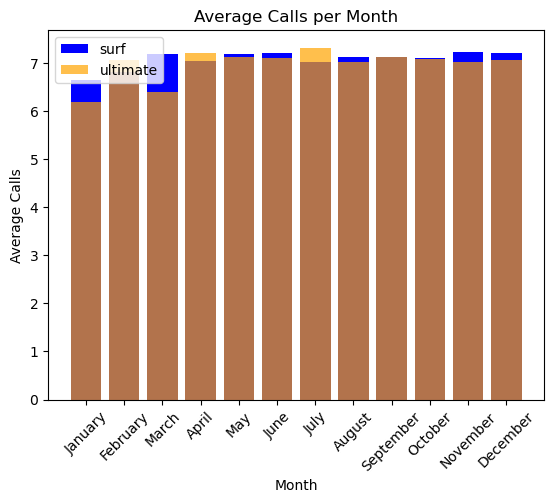

In [36]:
# Filter the data for 'surf' plan and plot
surf_call = surf_plan(calls_graph)
plt.bar(surf_call['month'], surf_call['avg_call'], color='blue', label='surf')

# Filter the data for 'ultimate' plan and plot
ultimate_call = ultimate_plan(calls_graph)
plt.bar(ultimate_call['month'], ultimate_call['avg_call'], color='orange', label='ultimate', alpha=0.7)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Calls')
plt.title('Average Calls per Month')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

It seems that the call duration doesn't vary much between plans or even from month to month with either plan. Just from a glance, the difference seems negligible, especially considering it's only a matter of seconds.

That said, since our main focus is revenue, let's shift our attention to the total usage per month in terms of minutes, instead of duration.

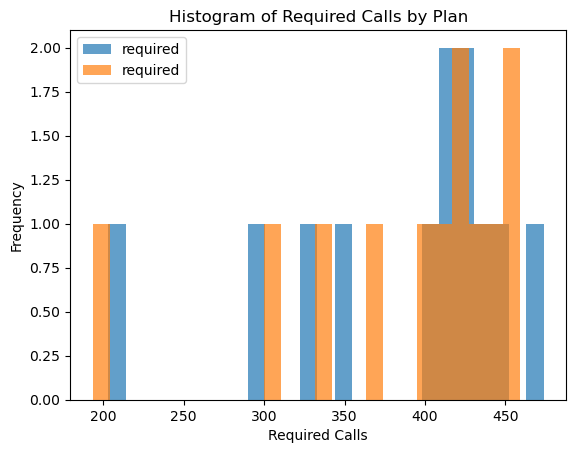

In [37]:
# Plot the graphs 
surf_call['required'].plot(kind='hist', alpha=0.7, bins=25)
ultimate_call['required'].plot(kind='hist', alpha=0.7, bins=25)

# Add labels and title
plt.xlabel('Required Calls')
plt.ylabel('Frequency')
plt.title('Histogram of Required Calls by Plan')
plt.legend()

plt.show()

Up to this point, the difference between the number of minutes required per plan seems to remain fairly consistent.

However, we can verify this mathematically:

In [38]:
# Setting the mean and variaction for Surf
calls_graph_mean_surf = round(surf_call['avg_call'].mean(), 2)
calls_graph_var_surf = round(np.var(surf_call['avg_call']), 2)

# Setting the mean and variaction for Ultimate
calls_graph_mean_ultimate = round(ultimate_call['avg_call'].mean(), 2)
calls_graph_var_ultimate = round(np.var(ultimate_call['avg_call']), 2)

print(f'Surf Mean: {calls_graph_mean_surf}; Variance: {calls_graph_var_surf}')
print(f'Ultimate Mean: {calls_graph_mean_ultimate}; Variance: {calls_graph_var_ultimate}')

Surf Mean: 7.08; Variance: 0.03
Ultimate Mean: 6.98; Variance: 0.1


From the values provided in the previous code, statistically speaking, I can confidently say that Surf has a higher mean and greater consistency. This conclusion is drawn from its significantly smaller variance, making it a lot more reliable.

Finally, I'd like to plot the values over a longer period of time to visually illustrate this.

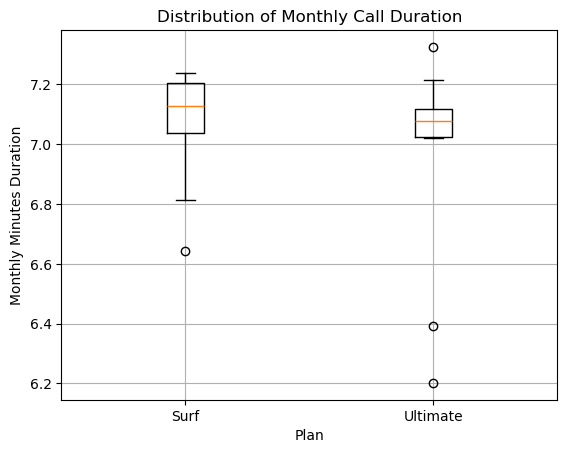

In [39]:
plt.boxplot([surf_call['avg_call'], 
            ultimate_call['avg_call']], 
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Monthly Minutes Duration')
plt.title('Distribution of Monthly Call Duration')
plt.grid(True)
plt.show()

As demonstrated by the box plots, the line indicating the mean within the box is higher in `surf`. Upon closer inspection, you'll notice circles that mark outliers not consistent with the box plot. The `ultimate` plan has a greater number of outliers, which also extend further away from the box plot, indicating why it's less consistent.

### 5.2 `internet`

Now, we'll move on to the internet usage for both plans and see how they compare.First, let's extract all the data we need from the updated analysis data frame.

In [40]:
# Extract the necessary columns.
internet_study = new_analysis.loc[:, ['plan', 'month', 'total_internet']]

# Calculate the avgerage call lenght per month per plan
internet_graph = internet_study.groupby(['plan', 'month']).agg(avg_internet=('total_internet', 'mean')).reset_index()

# Sort DataFrame by the 'month' column
internet_graph = internet_graph.sort_values(by='month')
internet_graph['month'] = pd.to_datetime(internet_graph['month'], format='%m').dt.month_name()

All the necessary steps from the call study were replicated, as shown above, so that we can evaluate the data in the same manner.

That said, I'd like to compare how both plans perform month to month in terms of internet usage.

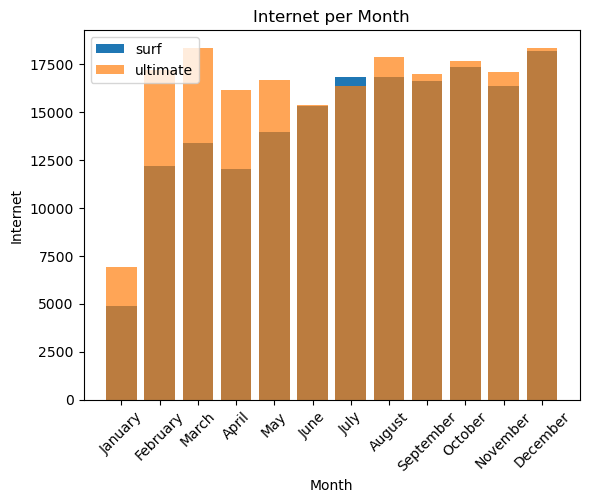

In [41]:
# Filter the data for 'surf' plan and plot
surf_internet = surf_plan(internet_graph)
plt.bar(surf_internet['month'], surf_internet['avg_internet'], label='surf')

# Filter the data for 'ultimate' plan and plot
ultimate_internet = ultimate_plan(internet_graph)
plt.bar(ultimate_internet['month'], ultimate_internet['avg_internet'], label='ultimate', alpha=0.7)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Internet')
plt.title('Internet per Month')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

This time, it appears that the Ultimate plan tends to have greater usage, but for internet per month. However, once again, we can verify this mathematically using mean and variance. 

In [42]:
# Setting the mean and variaction for Surf
internet_graph_mean_surf = round(surf_internet['avg_internet'].mean(), 2)
internet_graph_var_surf = round(np.var(surf_internet['avg_internet']), 2)

# Setting the mean and variaction for Ultimate
internet_graph_mean_ultimate = round(ultimate_internet['avg_internet'].mean(), 2)
internet_graph_var_ultimate = round(np.var(ultimate_internet['avg_internet']), 2)

print(f'Surf Mean: {internet_graph_mean_surf}; Variance: {internet_graph_var_surf}')
print(f'Ultimate Mean: {internet_graph_mean_ultimate}; Variance: {internet_graph_var_ultimate}')

Surf Mean: 14481.58; Variance: 12192739.37
Ultimate Mean: 16231.18; Variance: 8590954.01


Based on the calculations performed, it appears that this time the Ultimate plan has both the higher mean and the least variation, although both plans show a considerable amount of variation.

Next, I'd like to visualize this so that it's easier to see.

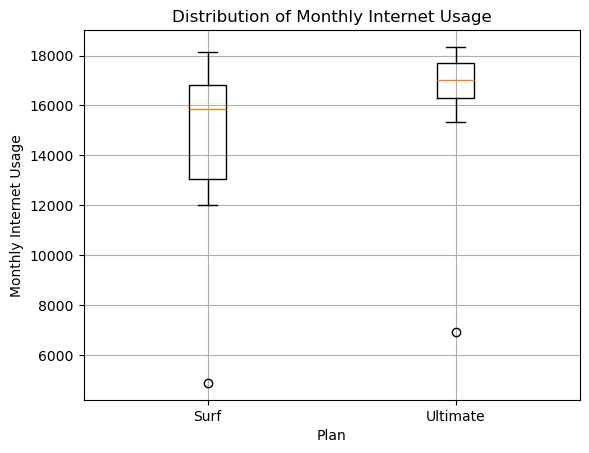

In [43]:
plt.boxplot([surf_internet['avg_internet'], 
            ultimate_internet['avg_internet']], 
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Monthly Internet Usage')
plt.title('Distribution of Monthly Internet Usage')
plt.grid(True)
plt.show()

When visually examining the data with a box plot, we can see that both plans have outliers pointing in the same direction. Notably, the Ultimate plan exhibits smaller variance, as indicated by the spacing on the visualization grid. Additionally, both the mean and median of the Ultimate plan consistently appear higher, and you can also observe that they are much closer together compared to the Surf plan.

### 5.3 `messages`

Now, we'll move on to the message usage for both plans and see how they compare. Let's extract all the data we need from the updated analysis data frame.

In [44]:
# Extract the necessary columns.
message_study = new_analysis.loc[:,['plan', 'month', 'total_messages']]

# Calculate the avgerage call lenght per month per plan
message_graph = message_study.groupby(['plan', 'month']).agg(avg_message=('total_messages', 'mean')).reset_index()

# Sort DataFrame by the 'month' column
message_graph = message_graph.sort_values(by='month')
message_graph['month'] = pd.to_datetime(message_graph['month'], format='%m').dt.month_name()

Now that we've gathered all the necessary information, let's take a visual look at the data provided and evaluate what we can see.

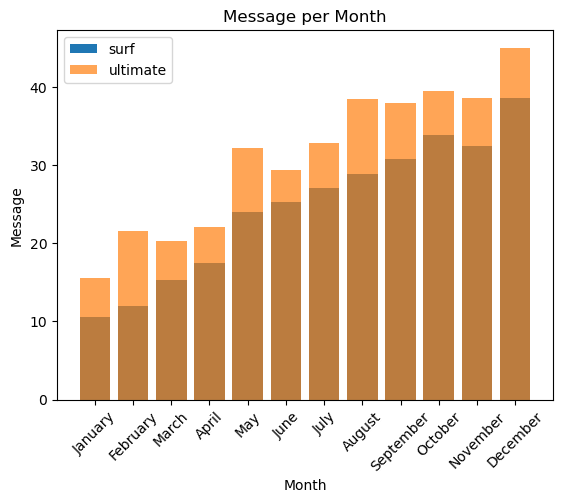

In [45]:
# Filter the data for 'surf' plan and plot
surf_message = surf_plan(message_graph)

plt.bar(surf_message['month'], surf_message['avg_message'], label='surf')

# Filter the data for 'ultimate' plan and plot
ultimate_message = ultimate_plan(message_graph)
plt.bar(ultimate_message['month'], ultimate_message['avg_message'], label='ultimate', alpha=0.7)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Message')
plt.title('Message per Month')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

Based on the previous graphs, my understanding suggests that Ultimate would once again have a higher mean and median with lower variance, potentially with one outlier trending towards zero.

Let's start to verify this mathematically.

In [46]:
# Setting the mean and variaction for Surf
message_graph_mean_surf = round(surf_message['avg_message'].mean(), 2)
message_graph_var_surf = round(np.var(surf_message['avg_message']), 2)

# Setting the mean and variaction for Ultimate
message_graph_mean_ultimate = round(ultimate_message['avg_message'].mean(), 2)
message_graph_var_ultimate = round(np.var(ultimate_message['avg_message']), 2)

print(f'Surf Mean: {message_graph_mean_surf}; Variance: {message_graph_var_surf}')
print(f'Ultimate Mean: {message_graph_mean_ultimate}; Variance: {message_graph_var_ultimate}')

Surf Mean: 24.66; Variance: 75.06
Ultimate Mean: 31.09; Variance: 80.07


It looks like I was close, but not entirely correct. This highlights the importance of understanding the numbers and being able to substantiate what you believe you see. Just as we did before, I'll illustrate these values more effectively with a box plot.

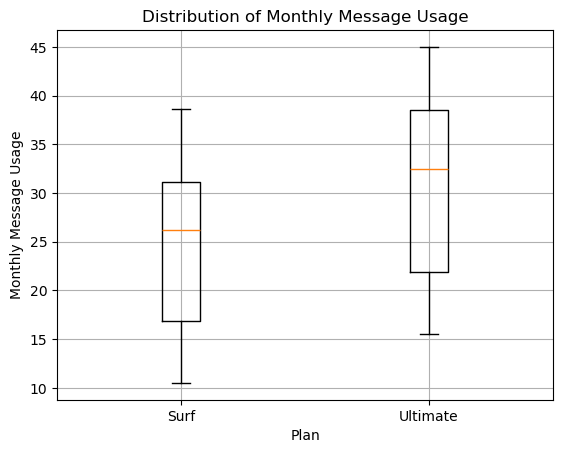

In [47]:
plt.boxplot([surf_message['avg_message'], 
            ultimate_message['avg_message']], 
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Monthly Message Usage')
plt.title('Distribution of Monthly Message Usage')
plt.grid(True)
plt.show()

I stand corrected; there don't appear to be any outliers in the graph. Nonetheless, this graph effectively displays what we noted mathematically. 

As far as I can see, in terms of the different methods of revenue, Ultimate generally has higher overall usage, while Surf tends to exhibit tighter variance.

## 6 Revenue 

Now that we have a better understanding of the various components that contribute to the revenue for each plan, we'll proceed with analyzing the revenue to determine which plan is better to advertise.

In [48]:
# Set up the data for the comparison
revenue = new_analysis.groupby(['plan', 'month'])['total_revenue'].mean().reset_index()

# Sort DataFrame by the 'month' column
revenue = revenue.sort_values(by='month')
revenue['month'] = pd.to_datetime(revenue['month'], format='%m').dt.month_name()

Now that we have the Revenue data frame set up, we can visualize each plan and observe how they differ per month in terms of their revenue, similar to what we've done before. 

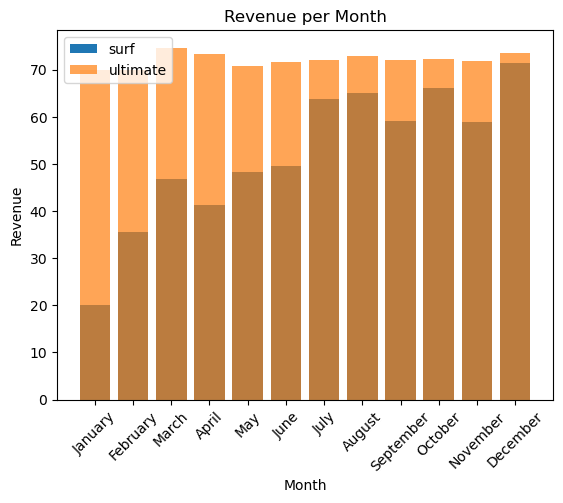

In [49]:
# Filter the data for 'surf' plan and plot
surf_revenue = surf_plan(revenue)
plt.bar(surf_revenue['month'], surf_revenue['total_revenue'], label='surf')

# Filter the data for 'ultimate' plan and plot
ultimate_revenue = ultimate_plan(revenue)
plt.bar(ultimate_revenue['month'], ultimate_revenue['total_revenue'], label='ultimate', alpha=0.7)

# Set labels and title
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue per Month')
plt.xticks(rotation=45)
plt.legend() 

plt.show()

After visually observing how the plans compare, it's evident that regardless of any consistencies we may have noticed in our case studies, the Ultimate plan consistently appears to have a higher mean and median, with virtually no outliers and the smallest spread in variation.


Regardless of what we observe in the graphs, it's prudent to double-check mathematically to ensure that this is indeed the case.

In [50]:
# Setting the mean and variaction for Surf
revenue_surf_mean = round(surf_revenue['total_revenue'].mean(), 2)
revenue_surf_var = round(np.var(surf_revenue['total_revenue']), 2)

# Setting the mean and variaction for Ultimate
revenue_ultimate_mean = round(ultimate_revenue['total_revenue'].mean(), 2)
revenue_ultimate_var = round(np.var(ultimate_revenue['total_revenue']), 2)

print(f'Surf Mean: {revenue_surf_mean}; Variance: {revenue_surf_var}')
print(f'Ultimate Mean: {revenue_ultimate_mean}; Variance: {revenue_ultimate_var}')

Surf Mean: 52.16; Variance: 203.19
Ultimate Mean: 72.08; Variance: 1.81


After examining the calculations, it seems to be exactly as I thought. The graphs strongly suggest this outcome, and the calculations have once again provided strong support. To gain a better visual understanding, I'd like to display how this looks.

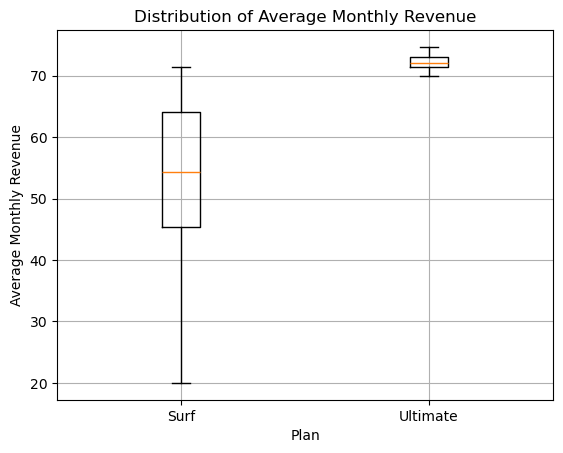

In [51]:
plt.boxplot([surf_revenue['total_revenue'], 
            ultimate_revenue['total_revenue']], 
            labels=['Surf', 'Ultimate'])

plt.xlabel('Plan')
plt.ylabel('Average Monthly Revenue')
plt.title('Distribution of Average Monthly Revenue')
plt.grid(True)
plt.show()

With this, it becomes very apparent that the Ultimate plan generates higher revenue compared to the Surf plan. While earlier we observed that Surf had a tighter variance in terms of the different revenue-generating methods, it's clear from what we see that this is not the case when it comes to revenue.

## 7 Test statistical hypotheses

Despite all the information we've gathered up until this point, we can further solidify whether the Ultimate plan would indeed be the best plan to invest more marketing resources into. While we can see that it brings in higher revenue, we can also test to see if this difference is statistically significant. 

### 7.1 Ultimate Revenue Significant

1. **Null Hypothesis (H₀):** There is no significant difference in revenue between Plan 1 (Ultimate) and Plan 2 (Surf).
2. **Alternative Hypothesis (H₁):** Plan 1 (Ultimate) has significantly more revenue than Plan 2 (Surf).

In [52]:
revenue_surf = surf_plan(new_analysis)['total_revenue']
revenue_ultimate = ultimate_plan(new_analysis)['total_revenue']

results = st.ttest_ind(revenue_ultimate, revenue_surf)

alpha = 0.05

if results.pvalue / 2 < alpha and results.statistic > 0:
    print("Null hypothesis rejected: Plan 1 (Ultimate) has significantly more revenue than Plan 2 (Surf).")
else:
    print("Null hypothesis cannot be rejected.")

Null hypothesis rejected: Plan 1 (Ultimate) has significantly more revenue than Plan 2 (Surf).


There's a meaningful difference in revenue between the two plans.

### 7.2 Does Area Make The Difference 

Even though there's a significant difference in revenue between the two plans across different user locations, I'm curious to see if the user's location makes a difference. For this analysis, I'd like to focus on the area I grew up in (NY-NJ).

1. **Null Hypothesis (H₀):** There is no significant difference in revenue between NJ-NY and pther areas.
2. **Alternative Hypothesis (H₁):** There is a significant difference in revenue between NJ-NY and pther areas.

In [53]:
hometown = new_analysis[new_analysis['city'].isin(['NJ', 'NY'])]['total_revenue']
other_areas = new_analysis[~new_analysis['city'].isin(['NJ', 'NY'])]['total_revenue']

results = st.ttest_ind(hometown, other_areas)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


It appears that the revenue from one state compared to another may indeed be vastly different. It might explain why our previous calculation showed no significance. The variation in revenue between states could be a significant factor influencing the overall results.

## Conclusion

With all calculations completed, we can see that not all areas are equal in terms of the revenue they generated. So, even though the Ultimate plan is significantly better than the Surf plan outright, it may depend on the location. Leaving me inclined to believe we may need to be more selective in the areas that we choose to advertise for and perform the analysis state by state.